In [1]:
from src.services.data_converter_service import DataConverterService
from src.services.predict_symbols_service import PredictSymbolsService
from src.utils.convert_points_to_bounding_box import convert_points_to_bounding_box


data_converter_service = DataConverterService()
datapoints  = data_converter_service.load_dataset()

datapoints_to_test = datapoints[:10]


In [2]:

pid_results = []
for dp_sample in datapoints_to_test:
    predict_service = PredictSymbolsService(
        image_path=dp_sample.image_path
    )
    pid_results.append(
        predict_service.predict_bounding_boxes()
    )


0: 1088x1088 1 21, 1 32, 259.0ms
Speed: 32.7ms preprocess, 259.0ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 1 10, 1 15, 1 19, 1 23, 1 24, 1 31, 121.8ms
Speed: 4.6ms preprocess, 121.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 2 8s, 1 19, 1 20, 1 31, 1 32, 114.5ms
Speed: 4.2ms preprocess, 114.5ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 (no detections), 120.7ms
Speed: 9.0ms preprocess, 120.7ms inference, 0.2ms postprocess per image at shape (1, 3, 1088, 1088)

0: 224x1088 (no detections), 49.9ms
Speed: 0.0ms preprocess, 49.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 1088)

0: 1088x1088 1 9, 1 14, 2 17s, 1 21, 1 31, 1 32, 118.1ms
Speed: 2.3ms preprocess, 118.1ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 1 5, 2 6s, 1 11, 1 21, 1 24, 1 25, 1 26, 1 28, 1 29, 1 30, 134.1ms
Speed: 0.0ms preprocess, 134.1ms inference

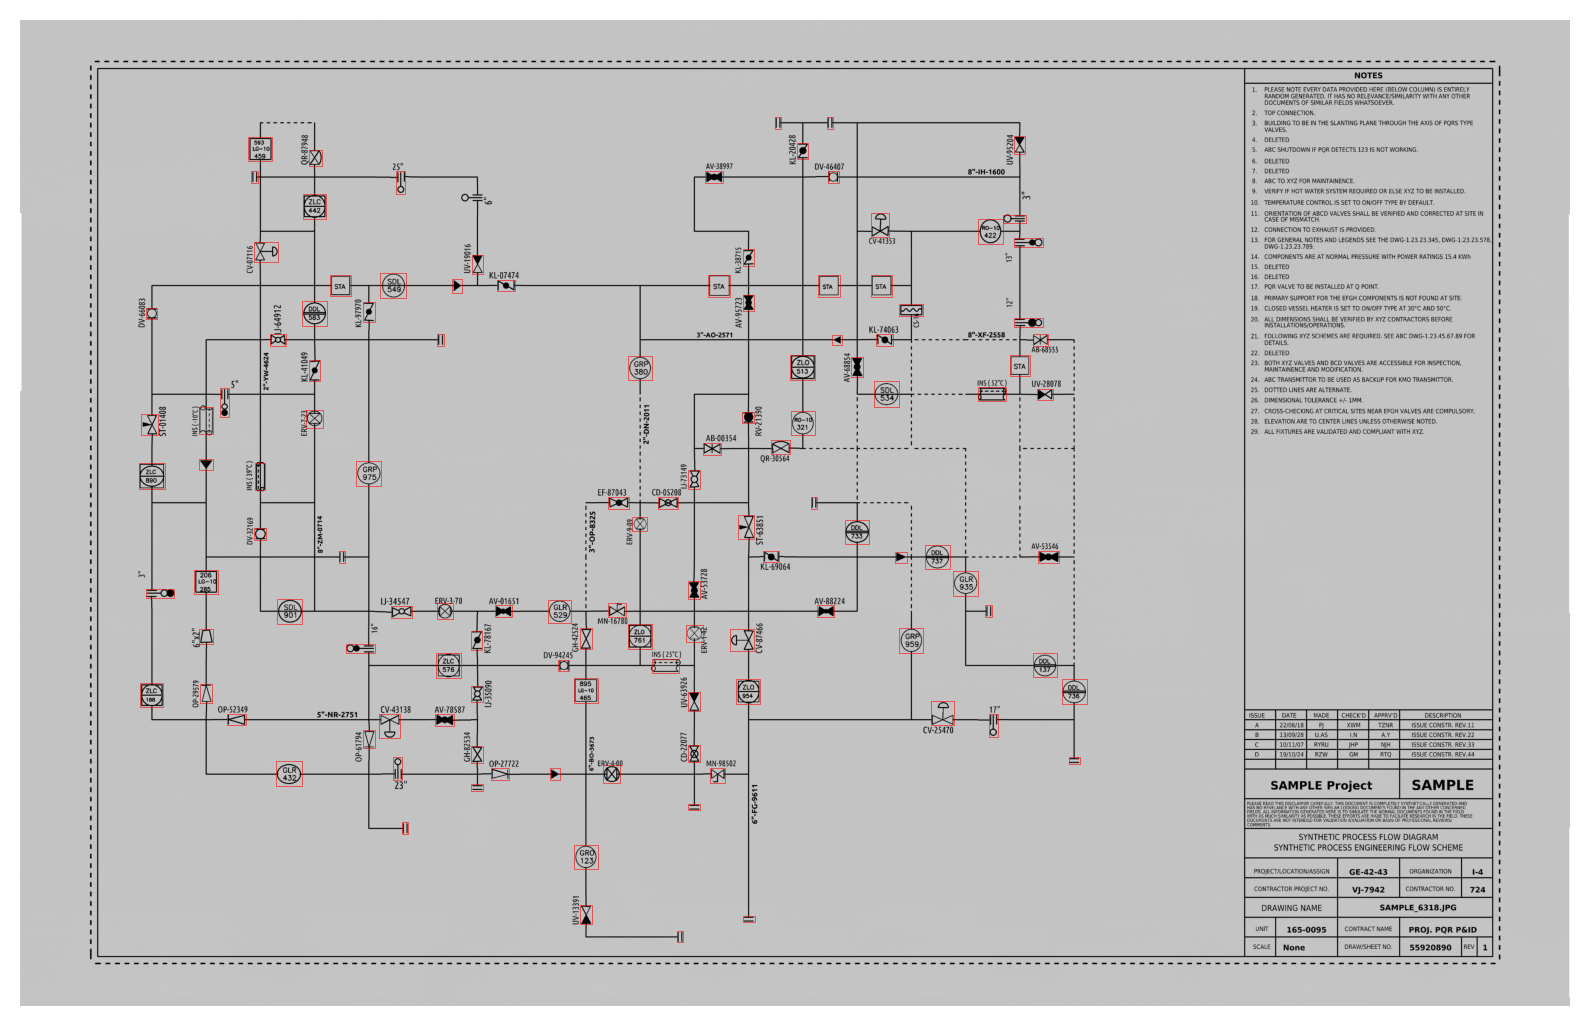

In [4]:
from src.services.image_display_serivce import ImageDisplayService


def bbox_name(d):
    bbox = convert_points_to_bounding_box([d[0][0], d[0][1], d[0][2], d[0][3]])
    return bbox

for index, result in enumerate(pid_results):
    display_service = ImageDisplayService(
        image_path=datapoints_to_test[index].image_path,
        bounding_boxes=list(map(bbox_name, result))
    )

    display_service.display_image_with_bbox()

127